In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import napari
from PIL import Image

In [39]:
# inputs
video = r'C:\Users\BMLab21\Documents\CrabStreams\2022-03-09.avi'
Learning_rate = 1.0/1000
cap = cv2.VideoCapture(video)
bg_subtractor = cv2.createBackgroundSubtractorMOG2()

In [38]:
ret, frame_1 = cap.read()
viewer = napari.view_image(frame_1, rgb=True) # 1.labels, 2.paint, 3.fill, 4.export as date e.g. desktop/arena shapes/2022_04_01.tiff

KeyboardInterrupt: 

In [40]:
arena_shape = Image.open(r'C:\Users\BMLab21\Desktop\arena_shapes\2022_04_01.tif')
arena_mask = np.dstack([arena_shape,arena_shape,arena_shape])

In [41]:
total_events = []
frame_n = 0
while(True):
    ret, frame = cap.read()
    if ret == True:
        frame_n +=1
        img = np.asarray(frame) * arena_mask
        mask = bg_subtractor.apply(img, learningRate=Learning_rate) 
        mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        event_frame = int(np.sum(mask))
        total_events.append(event_frame)
    else:
        break

cap.release()
cv2.destroyAllWindows()
total_events = np.array(total_events)
print('frames:', frame_n)

frames: 9904


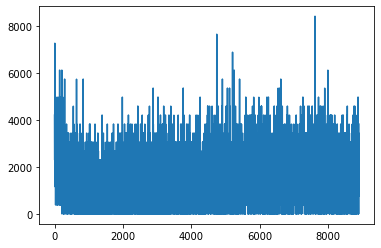

In [45]:
events_p1000 = total_events[1000:]
plt.plot(events_p1000)
#plt.plot(np.where(events_p1000>6000))

In [48]:
when_events = np.where(events_p1000>5000)
indexed_events = np.zeros(len(events_p1000))

for events in when_events[0]:
    indexed_events[events:events+100] = 1
    
indexed_events = np.hstack([np.zeros(1000), indexed_events[:len(events_p1000)]])

In [49]:
len(indexed_events)

9904

In [56]:
cap = cv2.VideoCapture(video)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

size = (frame_width, frame_height)

result = cv2.VideoWriter(r'C:\Users\BMLab21\Desktop\background_test.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'), # fourcc is how openCV finds the codec # MJPG is the codec
                         30, size)
iteration = 0

while(iteration<len(indexed_events)-1):
    iteration+=1
    event = indexed_events[iteration]
    ret, frame = cap.read()
    if ret == True:
        if event == 1:
            result.write(frame)
    else:
        break

cap.release()
result.release()
cv2.destroyAllWindows()